In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import numpy as np
import random
import math


In [2]:
data = pd.read_csv('../data/Bcard.txt')
data

,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
0,2018-10-31,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949
1,2018-07-31,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077
2,2018-09-30,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718
3,2018-07-31,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487
4,2018-07-31,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95801,2018-11-30,0.0,Ab99_96436391998107976,0.890233,0.442687,0.802687,0.776982,0.638971,0.605522,0.078853,0.142857,0.25,0.076923
95802,2018-11-30,0.0,Ab99_96436391998176292,0.161840,0.495766,0.085750,0.536738,0.596144,0.132972,0.078853,0.023810,0.00,0.076923
95803,2018-11-30,0.0,Ab99_96436391998322771,0.746522,0.732739,0.025475,0.831805,0.642904,0.029297,0.078853,0.023810,0.00,0.076923
95804,2018-11-30,0.0,Ab99_96436391998973383,0.176846,0.749610,0.933879,0.506921,0.867099,0.751643,0.078853,0.023810,0.02,0.076923


In [3]:
data['obs_mth'].unique()

array(['2018-10-31', '2018-07-31', '2018-09-30', '2018-06-30',
       '2018-11-30'], dtype=object)

In [4]:
data['obs_mth'].value_counts()


2018-07-31    34030
2018-06-30    20565
2018-11-30    15975
2018-10-31    14527
2018-09-30    10709
Name: obs_mth, dtype: int64

In [5]:
#划分训练集和测试集(使用最后一个月)
train = data[data['obs_mth'] != '2018-11-30']
val = data[data['obs_mth'] == '2018-11-30']


In [6]:
train


,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
0,2018-10-31,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949
1,2018-07-31,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077
2,2018-09-30,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718
3,2018-07-31,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487
4,2018-07-31,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79826,2018-09-30,0.0,Ab99_96436392005147255,0.905578,0.927706,0.994447,0.315842,0.959443,0.042640,0.078853,0.071429,0.13,0.076923
79827,2018-10-31,0.0,Ab99_96436392005205003,0.639265,0.219267,0.845014,0.751332,0.275557,0.902642,0.078853,0.023810,0.00,0.076923
79828,2018-10-31,0.0,Ab99_96436392005412387,0.355061,0.837747,0.931882,0.442463,0.579277,0.740754,0.078853,0.023810,0.02,0.076923
79829,2018-10-31,0.0,Ab99_96436392006241624,0.797237,0.501238,0.490850,0.592068,0.479618,0.859870,0.078853,0.023810,0.00,0.076923


In [7]:
feature_lst = ['td_score', 'jxl_score', 'mj_score','rh_score', 'zzc_score', 'zcx_score', 'person_info', 'finance_info','credit_info', 'act_info']


In [8]:
#准备训练集和验证集的x和y
x = train[feature_lst]
y = train['bad_ind']

val_x = val[feature_lst]
val_y = val['bad_ind']

In [9]:
#创建逻辑回归的模型
lr_model = LogisticRegression(C=0.1)
lr_model.fit(x,y)

LogisticRegression(C=0.1)

In [10]:
#predict(x)：输出结果不是一个概率值，而是一个具体值（0,1）
#但是，风控下，需要它的违约概率值的，因此不满足要求
y_pred = lr_model.predict_proba(x)[:,1]

In [11]:
#类别（0和1类别）
#模型抓的是1标签，而不是0
lr_model.classes_

array([0., 1.])

In [12]:
fpr_lr_train, tpr_lr_train, thresholds = roc_curve(y,y_pred)
fpr_lr_train

array([0.00000000e+00, 1.27614502e-05, 1.27614502e-05, ...,
       9.78522479e-01, 9.78522479e-01, 1.00000000e+00])

In [13]:
tpr_lr_train


array([0.00000000e+00, 0.00000000e+00, 6.80272109e-04, ...,
       9.99319728e-01, 1.00000000e+00, 1.00000000e+00])

In [14]:
train_ks = abs(fpr_lr_train - tpr_lr_train).max()
print('train_ks：',train_ks)

train_ks： 0.4196708292433754


In [15]:
y_pred = lr_model.predict_proba(val_x)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(val_y,y_pred)
val_ks = abs(fpr_lr - tpr_lr).max()
print('val_ks：',val_ks)

val_ks： 0.3822931458847406


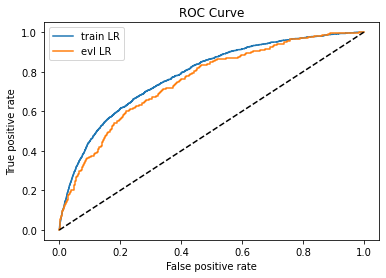

In [16]:
from matplotlib import pyplot as plt
plt.plot(fpr_lr_train,tpr_lr_train,label = 'train LR') #绘制训练集ROC
plt.plot(fpr_lr,tpr_lr,label = 'evl LR')               #绘制验证集ROC
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()


In [17]:
#对数据集进行特征筛选
import lightgbm as lgb
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=0,test_size=0.2)


In [18]:
#定义模型训练的方法
def  lgb_test(train_x,train_y,test_x,test_y):
    #objective：binary表示二分类，metric：指标采用auc
    clf =lgb.LGBMClassifier(boosting_type = 'gbdt',
                           objective = 'binary',
                           metric = 'auc',
                           learning_rate = 0.1,
                           n_estimators = 24,
                           max_depth = 5,
                           num_leaves = 20,
                           max_bin = 45,
                           min_data_in_leaf = 6,
                           bagging_fraction = 0.6,
                           bagging_freq = 0,
                           feature_fraction = 0.8,
                           )
    #eval_set：用于作为验证集的(X, y)元组对的列表。
    clf.fit(train_x,train_y,eval_set = [(train_x,train_y),(test_x,test_y)],eval_metric = 'auc')
    return clf,clf.best_score_['valid_1']['auc']

In [19]:
#调用自定义集成学习方法，获得模型和特征重要性
lgb_model,lgb_auc = lgb_test(train_x,train_y,test_x,test_y)


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Number of positive: 1182, number of negative

In [20]:
lgb_model


LGBMClassifier(bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.8,
               max_bin=45, max_depth=5, metric='auc', min_data_in_leaf=6,
               n_estimators=24, num_leaves=20, objective='binary')

In [21]:
lgb_model.best_score_['valid_1']['auc']

0.8119580950457441

In [22]:
lgb_model.feature_importances_


array([34, 32, 39, 34, 46, 44, 65, 50, 57, 55])

In [23]:
lgb_model.classes_


array([0., 1.])

In [24]:
lgb_model.feature_name_

['td_score',
 'jxl_score',
 'mj_score',
 'rh_score',
 'zzc_score',
 'zcx_score',
 'person_info',
 'finance_info',
 'credit_info',
 'act_info']

In [25]:
lgb_model.booster_.feature_name()

['td_score',
 'jxl_score',
 'mj_score',
 'rh_score',
 'zzc_score',
 'zcx_score',
 'person_info',
 'finance_info',
 'credit_info',
 'act_info']

In [26]:
#把特征重要性和特征名字拼接
#特征重要性的值越大，说明特征越重要，越要留下。不能删除。
pd.DataFrame({'name':lgb_model.booster_.feature_name(),
              'importance':lgb_model.feature_importances_}).sort_values(by=['importance'],
               ascending=False)

,name,importance
6,person_info,65
8,credit_info,57
9,act_info,55
7,finance_info,50
4,zzc_score,46
5,zcx_score,44
2,mj_score,39
0,td_score,34
3,rh_score,34
1,jxl_score,32


In [27]:
#特征筛选，保留特征重要性前4个特征，也就是内部数据的特征
feature_lst = ['person_info','finance_info','credit_info','act_info']


In [28]:
x = train[feature_lst]
y = train['bad_ind']

val_x = val[feature_lst]
val_y = val['bad_ind']
#模型训练
lr_model = LogisticRegression(C=0.1)
lr_model.fit(x,y)

LogisticRegression(C=0.1)

In [29]:
#模型预测
y_pred = lr_model.predict_proba(x)[:,1]
fpr_lr_train,tpr_lr_train,_ = roc_curve(y,y_pred)
train_ks = abs(fpr_lr_train - tpr_lr_train).max()
print('train_ks:',train_ks)

train_ks: 0.41573985983413414


In [30]:
y_pred = lr_model.predict_proba(val_x)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(val_y,y_pred)
test_ks = abs(fpr_lr - tpr_lr).max()
print('test_ks:',test_ks)


test_ks: 0.3928959732014397


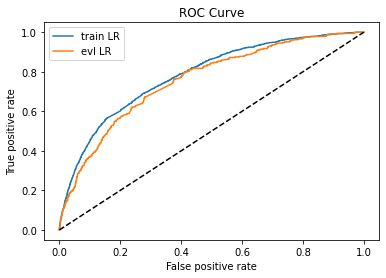

In [31]:
from matplotlib import pyplot as plt
plt.plot(fpr_lr_train,tpr_lr_train,label = 'train LR')
plt.plot(fpr_lr,tpr_lr,label = 'evl LR')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()


In [32]:
#每一个特征的斜率
lr_model.coef_

array([[ 2.48386162,  4.44901224,  1.88254182, -1.43356854]])

In [33]:
#截距
lr_model.intercept_

array([-3.90631899])

* 模型报告


In [40]:
bins = 20
temp_df = pd.DataFrame()
#使用逻辑回归模型进行预测
temp_df['bad_rate_predict'] = lr_model.predict_proba(val_x)[:,1]
#真实值y
temp_df['real_bad'] = val_y.values
#排序，按照预测的概率值，从大到小排序
temp_df = temp_df.sort_values('bad_rate_predict',ascending=False)
#把数据分为20箱
temp_df['num'] = [i for i in range(temp_df.shape[0])]
temp_df['num'] = pd.cut(temp_df['num'],bins=bins,labels=[i for i in range(bins)])
temp_df

,bad_rate_predict,real_bad,num
14623,0.556654,1.0,0
4280,0.544975,1.0,0
14375,0.437255,0.0,0
7935,0.433169,0.0,0
13272,0.432557,0.0,0
...,...,...,...
12821,0.003774,0.0,19
11901,0.003706,0.0,19
11684,0.003639,0.0,19
7081,0.003573,0.0,19


In [70]:
report = pd.DataFrame()
#计算bad的数量和good的数量
#astype：把小数转换为整数
report['BAD'] = temp_df.groupby('num')['real_bad'].sum().astype(int)
report['GOOD'] = temp_df.groupby("num")['real_bad'].count() - report['BAD']

#累计求和
report['BAD_CNT'] = report['BAD'].cumsum()
report['GOOD_CNT'] = report['GOOD'].cumsum()

#计算坏样本占比数
bad_total = report['BAD_CNT'].max()
good_total = report['GOOD_CNT'].max()
#保留三位小数
report['BAD_PCTG'] = round(report['BAD_CNT']/bad_total,3)
report['BADRATE'] = round(report['BAD']/(report['BAD'] + report['GOOD']),3)

#计算KS
def calc_ks(x):
    #ks = tpr - fpr
    #ks = TP/(TP+FN) - FP/(FP+TN)
    ks = x['BAD_CNT']/bad_total - x['GOOD_CNT']/good_total
    return round(abs(ks),3)
report['KS'] = report.apply(lambda x:calc_ks(x),axis=1)

In [71]:
report


,BAD,GOOD,BAD_CNT,GOOD_CNT,BAD_PCTG,BADRATE,KS
num,,,,,,,
0,69,730,69,730,0.210,0.086,0.164
1,50,749,119,1479,0.363,0.063,0.268
2,35,764,154,2243,0.470,0.044,0.326
3,31,767,185,3010,0.564,0.039,0.372
4,19,780,204,3790,0.622,0.024,0.380
5,18,781,222,4571,0.677,0.023,0.385
6,15,783,237,5354,0.723,0.019,0.380
7,14,785,251,6139,0.765,0.018,0.373
8,17,782,268,6921,0.817,0.021,0.375


In [72]:
bad_total


328

In [73]:
good_total

15647

* 画图


In [74]:
from pyecharts.charts import *
from pyecharts import options as opts
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
np.set_printoptions(suppress=True)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
line = (

    Line()
    .add_xaxis(report.index.values.tolist())
    .add_yaxis(
        "分组坏人占比",
        list(report.BADRATE),
        yaxis_index=0,
        color="red",
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="评分卡模型表现"),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="KS值",
            type_="value",
            min_=0,
            max_=0.5,
            position="right",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="red")
            ),
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        )

    )
    .add_yaxis(
        "KS",
        list(report['KS']),
        yaxis_index=1,
        color="blue",
        label_opts=opts.LabelOpts(is_show=False),
    )
)
line.render()


'D:\\code\\workspace2\\financial20\\day05\\render.html'

* 评分映射


In [78]:
#得到线性方程的系数
coef_ = lr_model.coef_.tolist()[0]
#feature_lst = ['person_info','finance_info','credit_info','act_info']
def score(x):
    lr_result = x['person_info'] * coef_[0] + x['finance_info'] * coef_[1] + x['credit_info'] * coef_[2] + x['act_info'] * coef_[3]
    score = 600 + 50 * lr_result/math.log(2)
    return score

In [79]:
#这本质上就是在做预测
val['score'] = val.apply(lambda x:score(x),axis=1)
val

<ipython-input-79-02ff7566906d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['score'] = val.apply(lambda x:score(x),axis=1)


,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info,score
79831,2018-11-30,0.0,A10002345,0.123276,0.872117,0.723560,0.759074,0.184735,0.080376,-0.053718,0.047619,1.00,0.230769,717.590397
79832,2018-11-30,0.0,A10003755,0.462460,0.157643,0.762271,0.481466,0.967006,0.780087,0.013863,0.023810,0.00,0.230769,586.261231
79833,2018-11-30,0.0,A1000756,0.812642,0.400040,0.280942,0.099454,0.942880,0.588936,0.078853,0.023810,0.02,0.474359,575.431888
79834,2018-11-30,0.0,A100085,0.007039,0.396036,0.857868,0.882255,0.345511,0.419969,-0.053718,0.047619,0.02,0.666667,539.433441
79835,2018-11-30,0.0,A10008856,0.078063,0.291289,0.654864,0.528708,0.754482,0.732534,0.013863,0.023810,0.00,0.230769,586.261231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95801,2018-11-30,0.0,Ab99_96436391998107976,0.890233,0.442687,0.802687,0.776982,0.638971,0.605522,0.078853,0.142857,0.25,0.076923,685.969778
95802,2018-11-30,0.0,Ab99_96436391998176292,0.161840,0.495766,0.085750,0.536738,0.596144,0.132972,0.078853,0.023810,0.00,0.076923,613.814845
95803,2018-11-30,0.0,Ab99_96436391998322771,0.746522,0.732739,0.025475,0.831805,0.642904,0.029297,0.078853,0.023810,0.00,0.076923,613.814845
95804,2018-11-30,0.0,Ab99_96436391998973383,0.176846,0.749610,0.933879,0.506921,0.867099,0.751643,0.078853,0.023810,0.02,0.076923,616.530779


In [80]:
fpr,tpr, _ = roc_curve(val_y,val['score'])
val_ks = abs(fpr - tpr).max()
val_ks

0.3928959732014397

In [81]:
#根据评分来给用户分级别，实现类似于芝麻信用分（京东小白分）的效果
def level(score):
    level = 0
    if score <= 550:
        level = "D"
    elif score <= 600 and score > 550 :
        level = "C"
    elif score <= 620 and score > 600:
        level = "B"
    elif  score > 620 :
        level = "A"
    return level

In [82]:
val['level'] = val['score'].apply(lambda x:level(x))
val

<ipython-input-82-09ed1dc12c28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['level'] = val['score'].apply(lambda x:level(x))


,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info,score,level
79831,2018-11-30,0.0,A10002345,0.123276,0.872117,0.723560,0.759074,0.184735,0.080376,-0.053718,0.047619,1.00,0.230769,717.590397,A
79832,2018-11-30,0.0,A10003755,0.462460,0.157643,0.762271,0.481466,0.967006,0.780087,0.013863,0.023810,0.00,0.230769,586.261231,C
79833,2018-11-30,0.0,A1000756,0.812642,0.400040,0.280942,0.099454,0.942880,0.588936,0.078853,0.023810,0.02,0.474359,575.431888,C
79834,2018-11-30,0.0,A100085,0.007039,0.396036,0.857868,0.882255,0.345511,0.419969,-0.053718,0.047619,0.02,0.666667,539.433441,D
79835,2018-11-30,0.0,A10008856,0.078063,0.291289,0.654864,0.528708,0.754482,0.732534,0.013863,0.023810,0.00,0.230769,586.261231,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95801,2018-11-30,0.0,Ab99_96436391998107976,0.890233,0.442687,0.802687,0.776982,0.638971,0.605522,0.078853,0.142857,0.25,0.076923,685.969778,A
95802,2018-11-30,0.0,Ab99_96436391998176292,0.161840,0.495766,0.085750,0.536738,0.596144,0.132972,0.078853,0.023810,0.00,0.076923,613.814845,B
95803,2018-11-30,0.0,Ab99_96436391998322771,0.746522,0.732739,0.025475,0.831805,0.642904,0.029297,0.078853,0.023810,0.00,0.076923,613.814845,B
95804,2018-11-30,0.0,Ab99_96436391998973383,0.176846,0.749610,0.933879,0.506921,0.867099,0.751643,0.078853,0.023810,0.02,0.076923,616.530779,B


In [87]:
#统计总的数量
#val['level'].value_counts()
#总计总的概率
val['level'].value_counts(1)

C    0.318185
B    0.248951
A    0.234930
D    0.197934
Name: level, dtype: float64

In [85]:
#手动实现概率统计
val['level'].groupby(val['level']).count()/len(val)

level
A    0.234930
B    0.248951
C    0.318185
D    0.197934
Name: level, dtype: float64